# What is Docker

## Containers and their advantages

A container is a portable computing environment that contains everything needed to run a workflow/application, including dependencies, code and configuration. Containers are like empty computers in which we add the code, then we install all the dependencies and configuration, finally we can create backups of that computer. With that we can use that backups on another computer and everything we installed and configured would work just like it did originally.

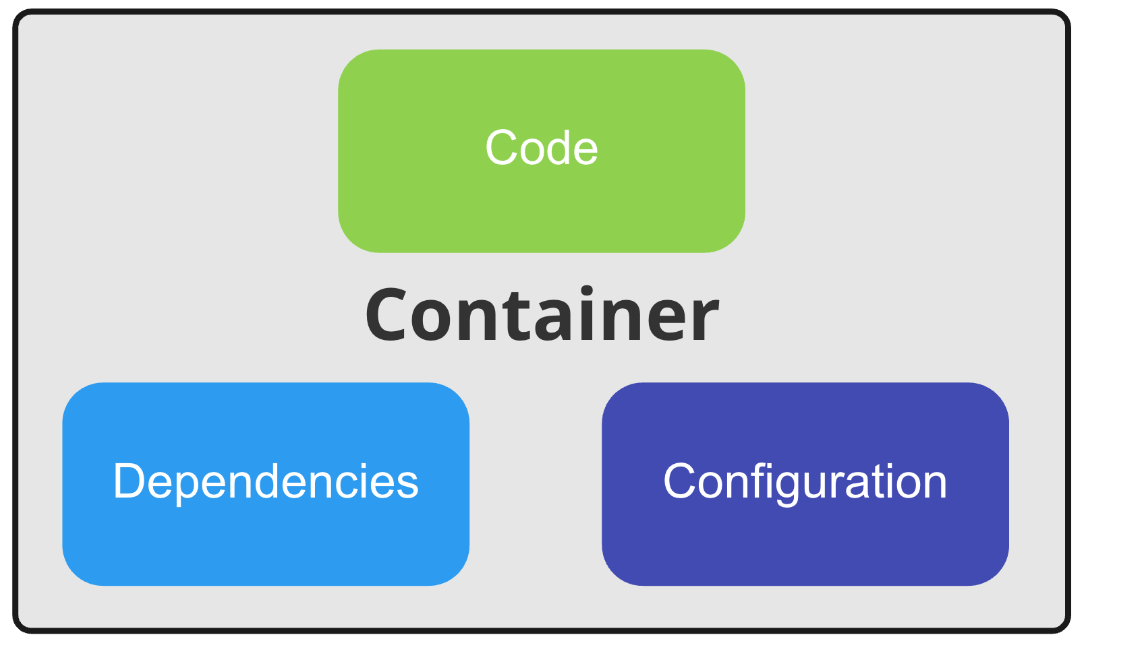

The backups that I mentioned before are similar to a container; both are a packaging of code, dependencies (including the OS) and configuration. One of the main advantages is that containers provide reproducibility, it means that whenever a container is run, the workflow/application it contains will behave identically.

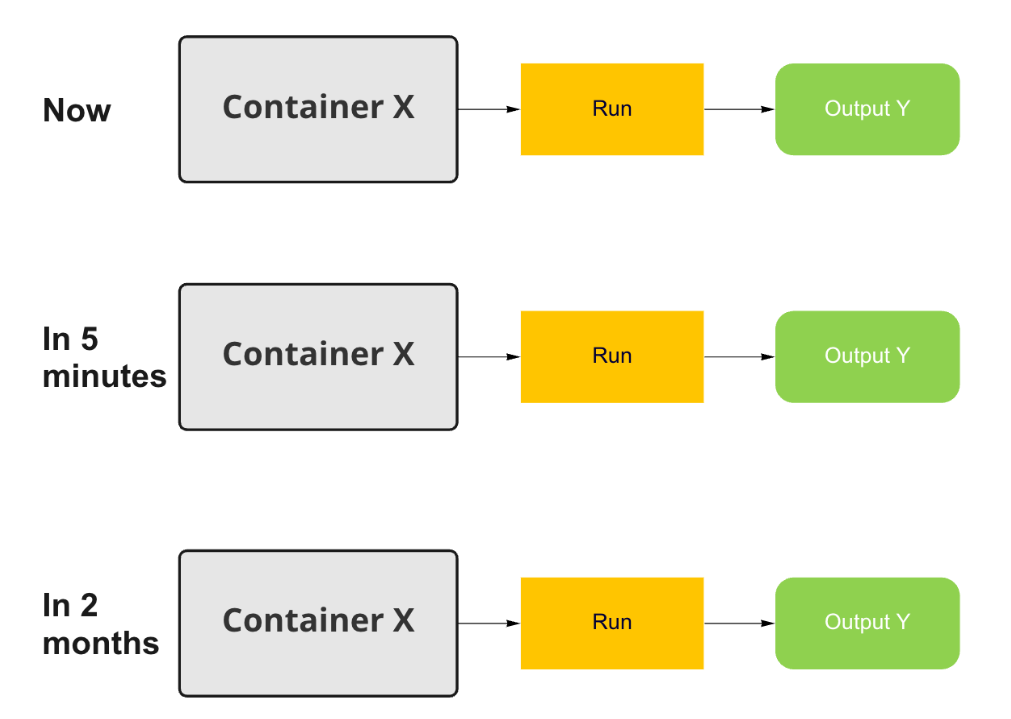

The second main benefit of containers is that wherever a container is run, it will behave identically, so containers provide portability. They eradicate the risk of removed dependencies, lost configuration files, or other changes that could break the application.

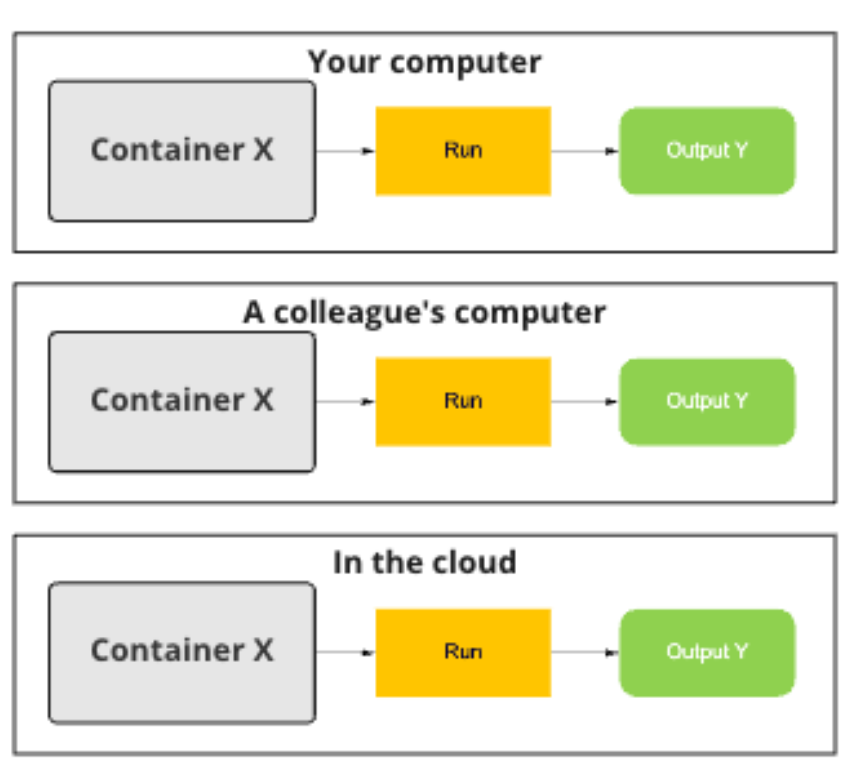

It is achieved because of the isolation between the container and the rest of the environment; running a container will have no impact outside of it and vice versa. A container has limited resource access to the OS it is running on; everything else is kept separate. 

This isolation also helps us to provide security, even if one container is compromised, the other containers on the same host and the host itself remain secure since there is no direct communication between containers. Whatever we modify inside a container will only affect that container and nothing more.

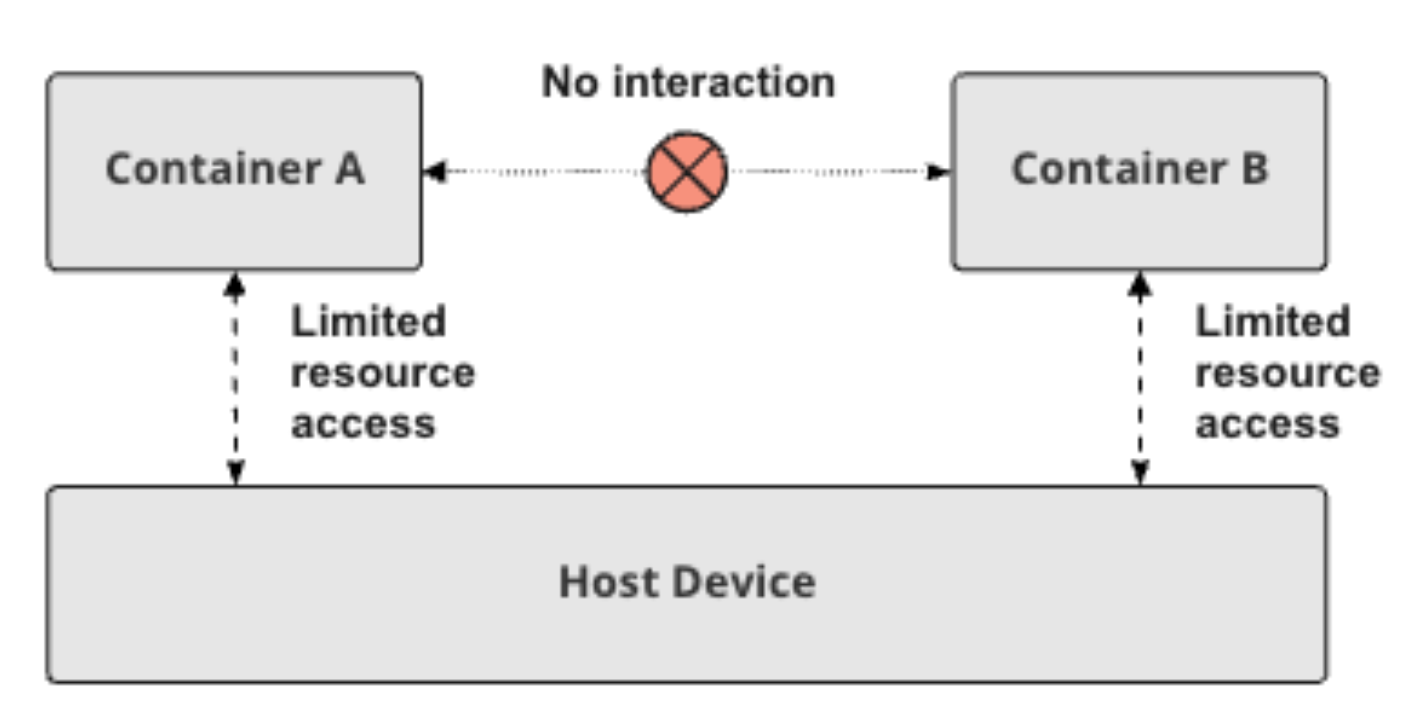

Another big advantage for containers is that they are lightweight. They use a few extra resources in comparison to running an application outside of a container. Containers have little overhead compared to alternatives that also provide isolation. This is relevant when comparing containers to VM's

## Main Advantages for containers

- Security
- Portability
- Reproducibility
- Lightweight


# The Docker Engine

Docker is an open-source tool that allows us to create, run and manage containers. Docker has grown to be part of a large ecosystem of tools around containers like kubernetes (System for container scheduling and management) or docker Compose (Tool for defining and running multi-container Docker applications). 

Docker has a client-server architecture. 

- The client is the command line interface (cli) that we use to talk to the server.
- The Docker engine also includes an API specifications, which define how you can interact with the server. These API's are not only used by the client but also specify how other applications can work with the Daemon.
- The server is a background process that requires no user interaction (that's why it is called a daemon)

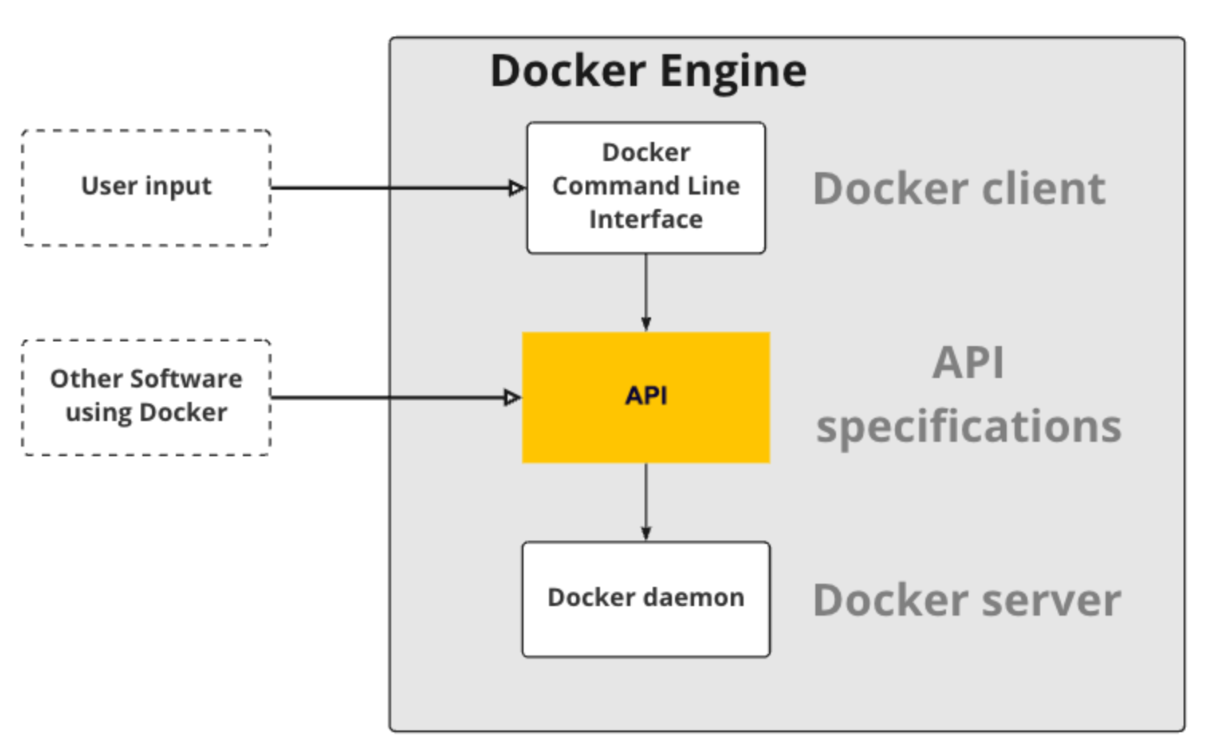

## The Docker Daemon

Is responsible for managing all Docker objects, such as images, containers and more. Keep in mind that in order to indicate the server what to do, we must use a client such as the cli or the Docker Desktop (UI).

### Difference between an image and a container:
- An image is a blueprint, like an idle copy of a hard drive which contains all the software that we want to run.
- A container is a running image, like a copy of the same hard drive but plugged into a computer.
- Images are blueprints, while a container is a running image, the image is just the template it got started from.

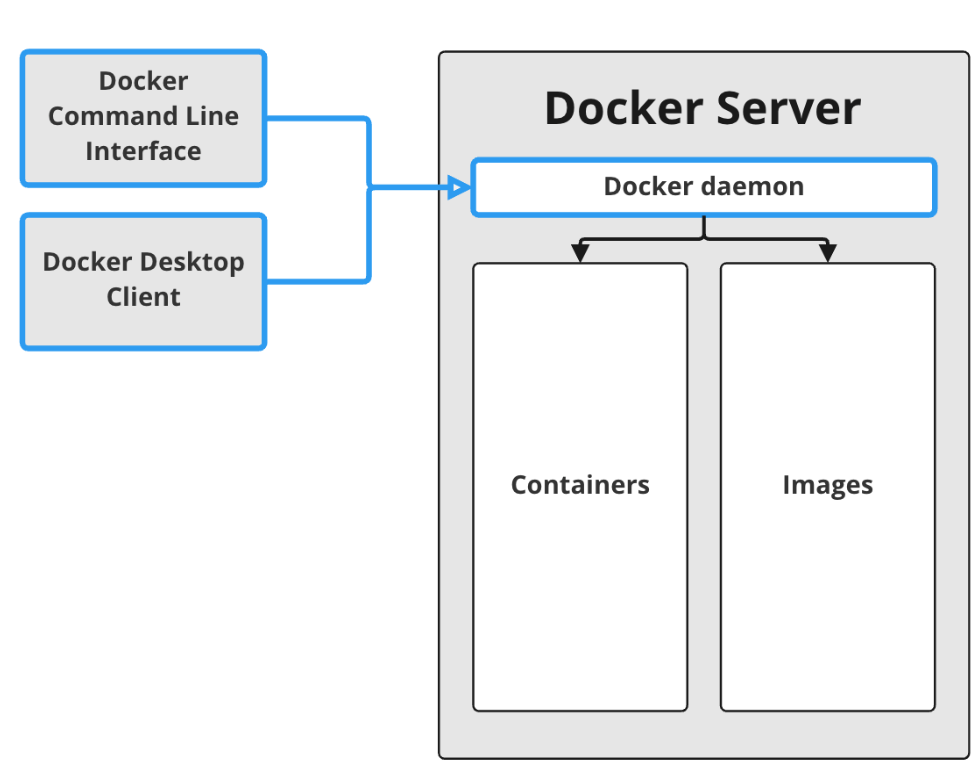

### What is a container

We can think of containers as processes. When we start a container a new process is started in the OS. The main difference between container processes and others is its permissions to resources like the file system, memory and network.

For many resources of a container process, not only is access restricted, but also undetectable to the process. This means that wen we have a running container, it will only have access to a single folder and cannot see files outside of that folder. With that we can now create processes that are isolated from the rest of the machine. 

Containers use their own OS instead of using the host's OS. The Daemon ensures that the OS running in a container is unaware of other containers and the host OS. The OS inside the container can start and manage it's own processes without interfering with the ones running in the host OS.

### Containers vs. standard processes

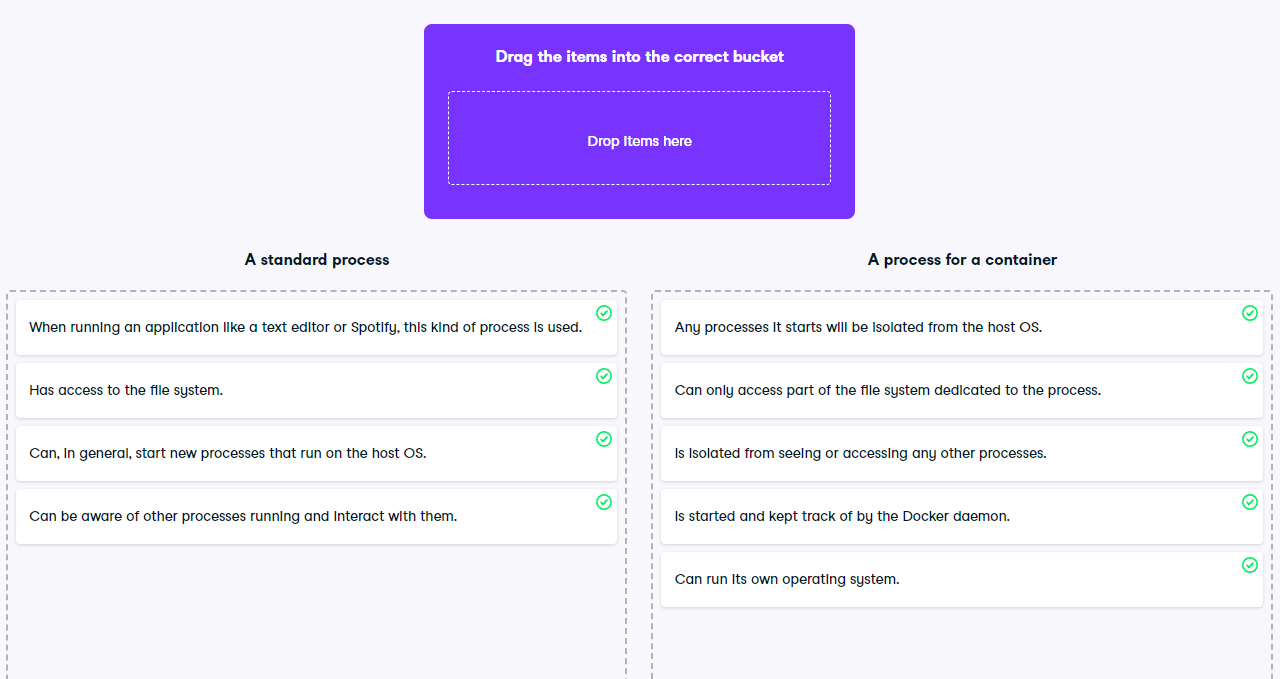

# Containers vs. Virtual Machines (VM's)

Both VM's and containers aim to run software side by side on the same physical machine safely, without interfering to each other. In order to achive this goal we must talk about virtualization.

## Virtualization

It means that resources like RAM, CPU, ord Disk can be split up and look like separate resources to the software using them. With virtualization each piece of software has it's own resources so they can't interfere with other parts or software components. Both containers and VM's are virtualization technologies.

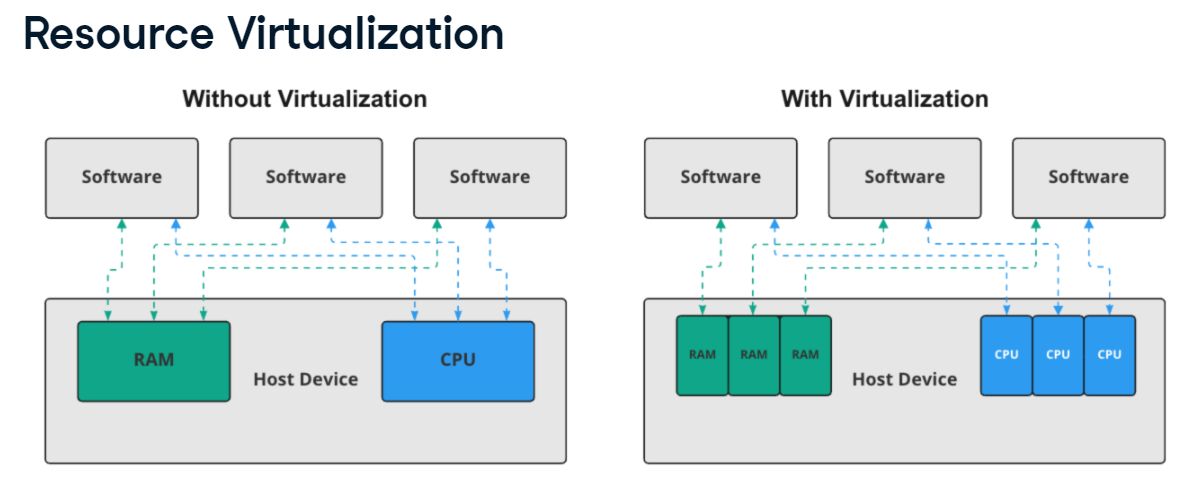

The main difference between VM's and containers is that the VM's virtualize the entire machine down to the hardware while containers virtualize in a software layer above the OS level. This means that separation in VMs is better as only the hardware remains shared while for containers the host OS is also sheared.

A drawback of containers is that there is always a possibility for attackers to get access to the host OS, once they have gotten access to the host OS, which would give them access to all containers running on the same machine. The risk of attackers accessing the host is limited when using and industry-standard container provider.

## Advantages of using containers

1. Their size in memory and on disk is lighter than VMs. Containers require less RAM and less disk space
2. They are significantly smaller because they only need to include a small part of the full OS.
3. Easier to start and stop
4. Faster to distribute, change or update data.
5. VMs can easily become heavy in storage size, VM's are built from scratch for every use case.

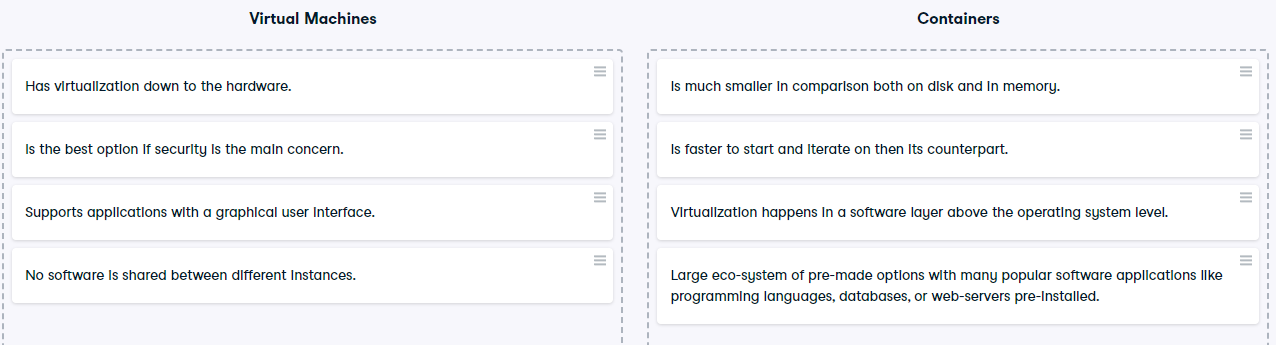




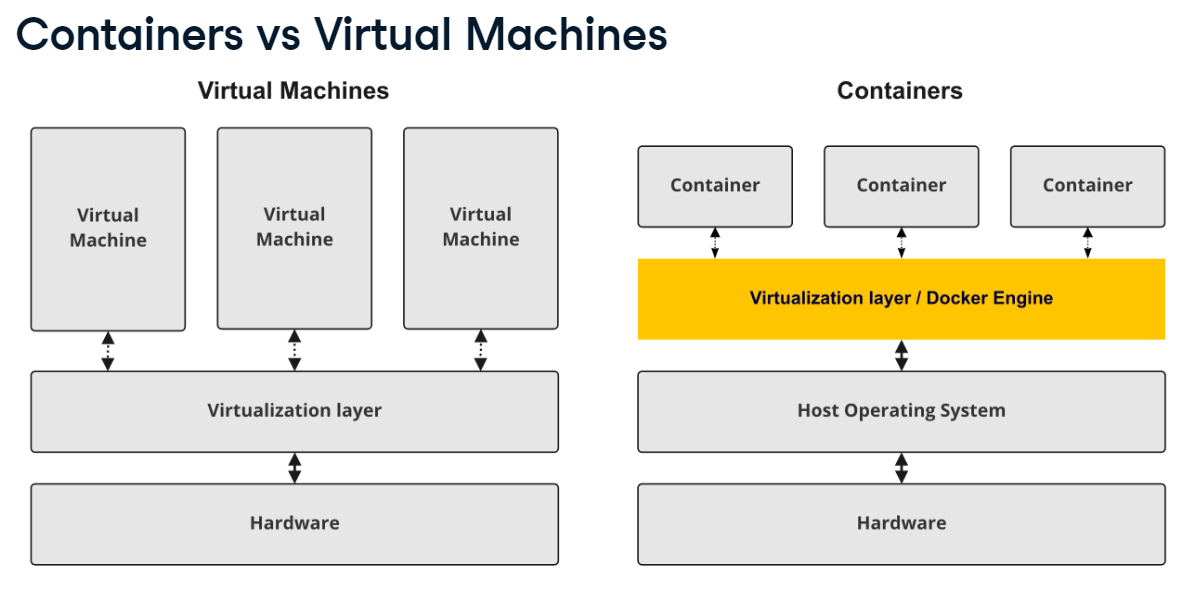

# Running Docker containers

## The Docker Command Line Interface (CLI)

We will use it to send instructions to the Docker daemon, which is responsible for managing our containers and images.

Every Docker command in the CLI starts with docker.

Before we can start a container, we have to choose which image to start it from. We need an image because they're blueprints from which we can start containers. Images will define what will be installed and available when the container is started. The container is the running instance of the image, which we can interact with.

__CLI command to start an image__:

```bash
docker run imageName
```

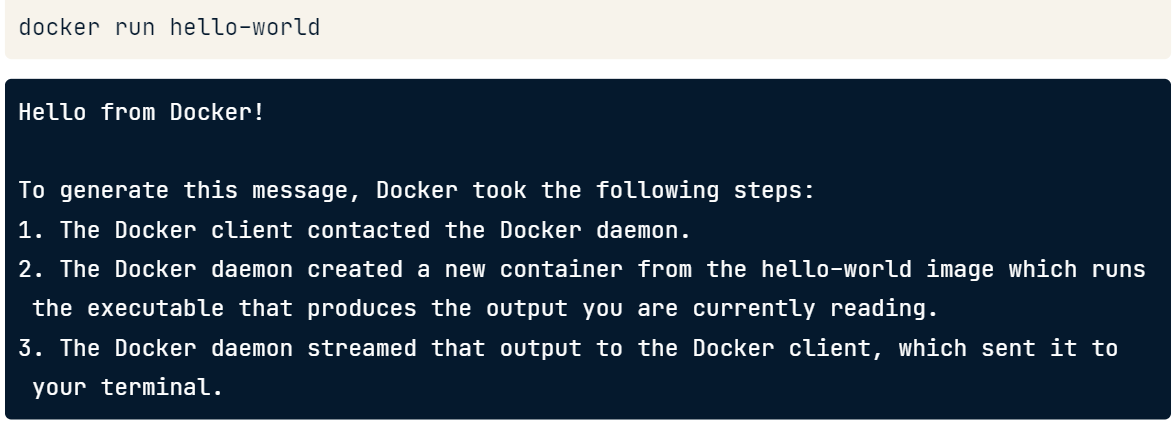

When an image is created, the creator can choose what will happen when a container is started from the image. 

__CLI command to start an image with an interactive shell__:

```bash
docker run -it imageName
```

With this command a new CLI will be deployed which will be inside the new container. To exit the interactive CLI you just have to use the command **exit**. The i and t flag are actually two separate flags with different effects. However they are almost always used together and it's much easier to remember them as the flag to make a container interactive

__CLI command to run a container detached__:

```bash
docker run -d imageName
```
This type of container processes data or can be interacted with in some way. This command will run the container in the background, giving us back control of the shell.

## Listing and stopping running containers

```bash
docker ps
```
This command allows us to see it and any other running containers.

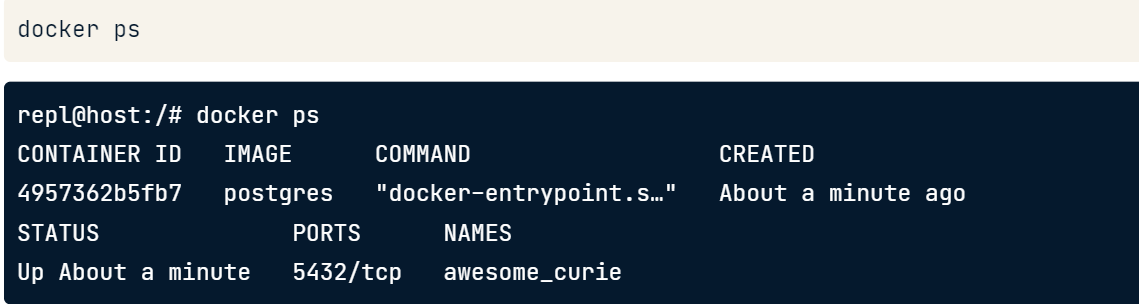

It has a name flag that allows us to name a container. 

```bash
docker ps --name containerName imageName
```

We can also use it with the filter (f) flag to find a specific container

```bash
docker ps --f "name=containerName"
```

## Stop containers that we are not using

```bash
docker stop containerID
```
All the containers have an ID that can be used to refer to a specific container in CLI commands. It's always good practice to stop containers once you're done using them, or one day you'll find a bunch of running containers on your machine without knowing if they are safe to shut down

## Summary of the session:

Using docker containers to run project dependencies is a great way to keep your local environment clean and be able to switch quickly between projects.

For any commands that require us to specify a container, we can use either the container-id or it's name.

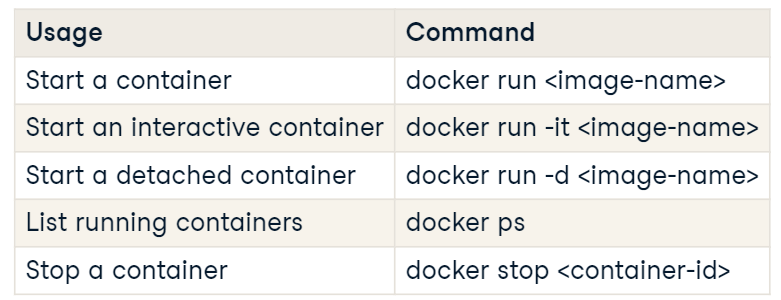

## Container logs

It's a command to debug any issues. It shows the output that a container generated. 

The f flag will allow us to keep live track of the logs generated by the container.

Looking at logs is a great way to debug issues, also when working with containers.
```bash
docker logs -f containerID
```

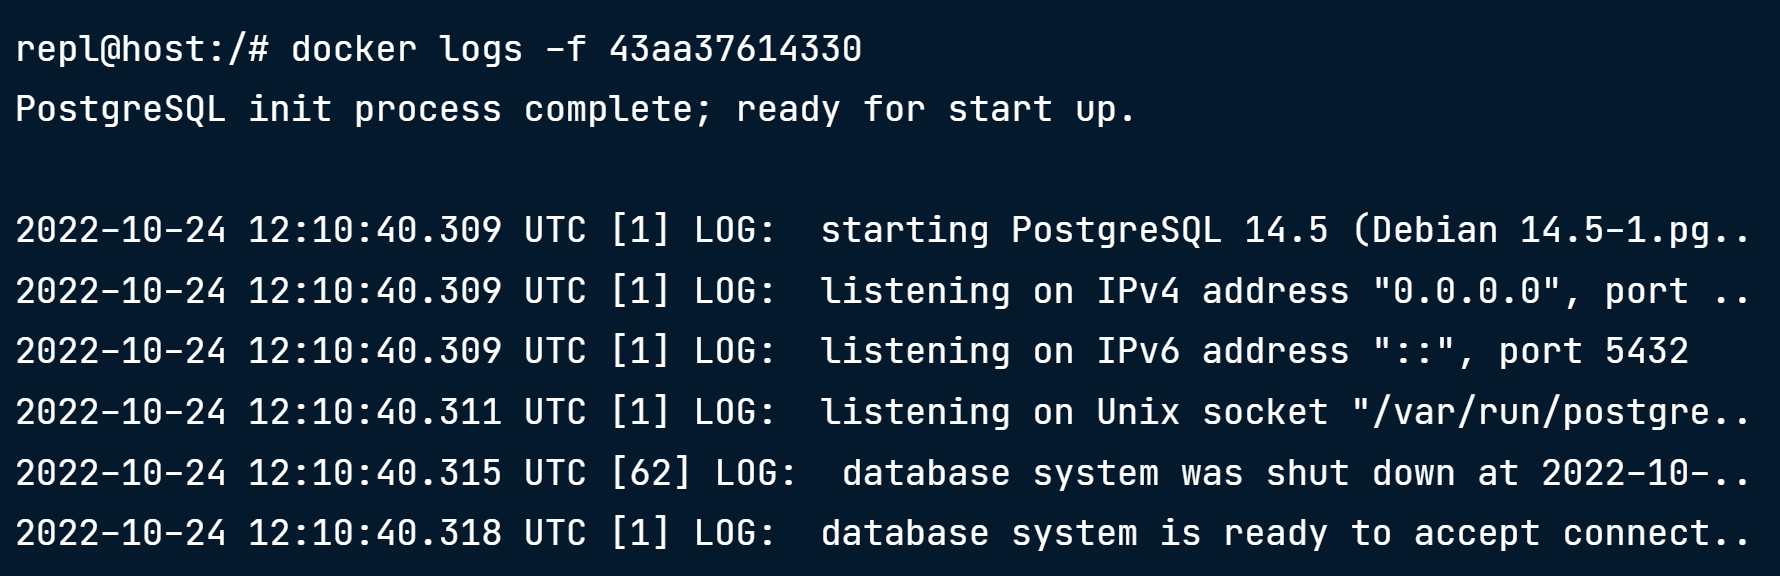


## Deleting a container

A stopped container is not fully gone; the stopped container still exists and is occupying space on the hard drive. In order to completely remove an already stopped container, we use the next command:

```bash
docker container rm containerID
```

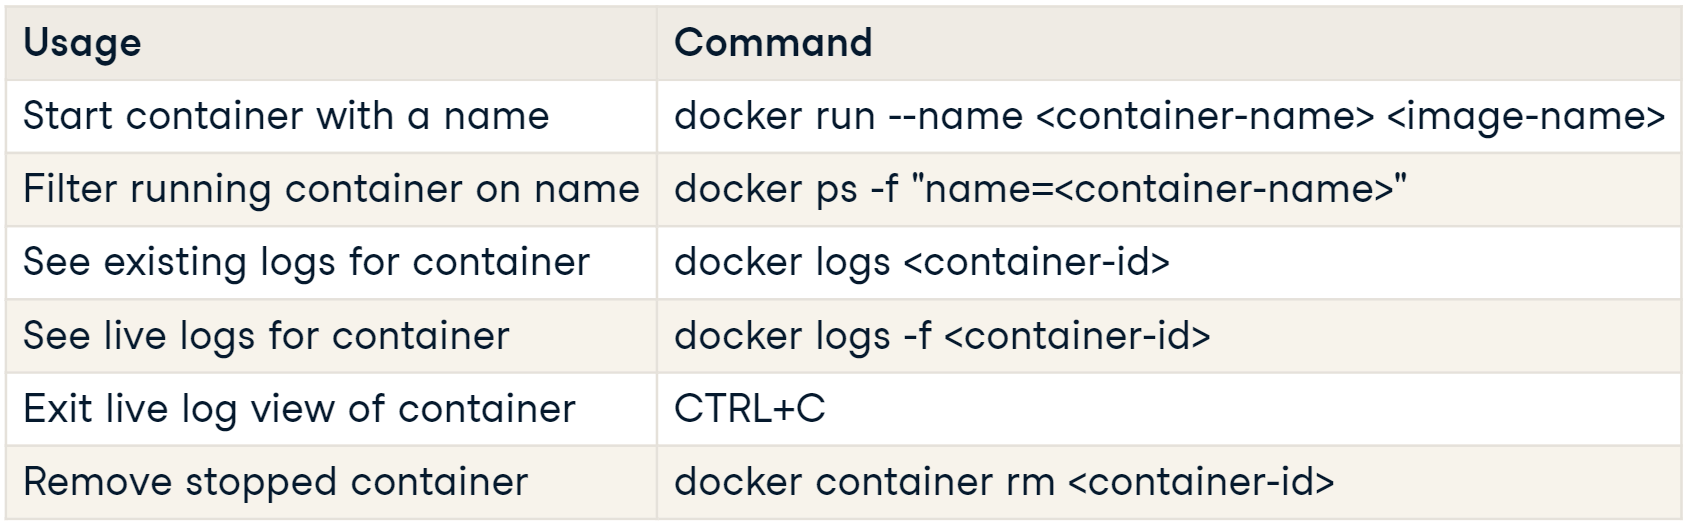

# Managing local docker images

## Docker Hub

It's a registry of community-made Docker images, we can download (pull and image) thousands of pre-made images for all kinds of use cases.

**Pulling an image from CLI:**
```bash
docker pull imageName:imageVersion
```
With the previous command, if we don't specify the imageVersion, we will always get the latest version available of the image. The imageVersion can be a number, text, or a combination of both. 

**Listing images in the CLI:**
```bash
docker images
```
It will give us a list of all available images, tags, the image size, creation date and the image ID. 

## Removing images

Docker only has a limited amount of space it can use on our disk. A container is a running image; we can only delete an image once there are no more containers based on it. 

**Remove image from CLI:**
```bash
docker image rm imageName
```

## Cleaning containers
It's common to have multiple containers based on a single image. To more easily clear all stopped containers, we can use docker container prune, then we can use docker image prune -a to remove all unused images.

**Cleaning images:**
```bash
docker container prune
docker image prune -a
```

We can have dangling images which are images that no longer has a name because the name has been re-used for another image.

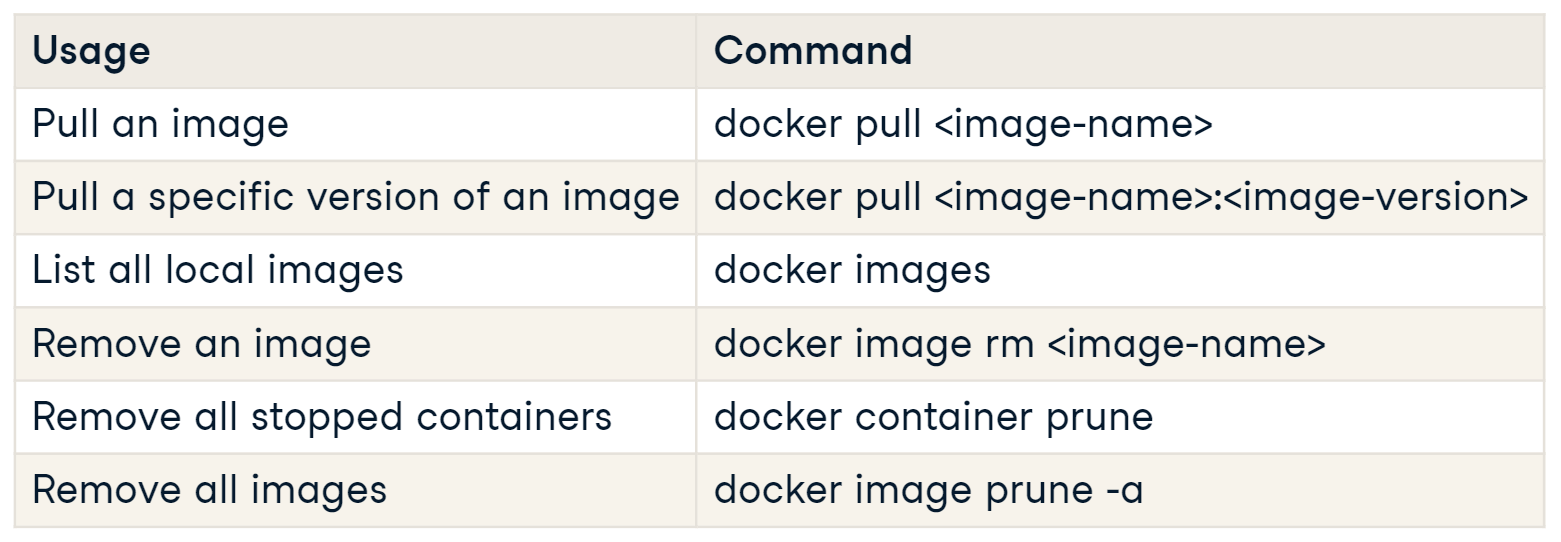

# Distributing Docker Images

We can either send docker images like we would send any other file or using a Docker registry server.

## Private Docker registries

- There is no quality guarantee (the images found here are under the control of another person or group, not by Docker)
- It's name starts with the url of the private registry they come from: dockerhub.privateRegistry.com/imageName:imageVersion
- To download/pull an image from a private registry we have to use the docker pull command
```bash
docker pull dockerhub.privateRegistry.com/imageName:v1
```
- To upload/push images to a registry we have to use the push command, to send it to a specific registry, we only have to make sure the image name starts with the name of the registry we want to push to.
```bash
docker image push dockerhub.privateRegistry.com/imageName
```
- docker tag: It's used to rename an image, first we specify the new name (tag) of the image and then the url of the private registry and finally use docker image push with the new tag.
```bash
docker tag imageTagName:version dockerhub.privateRegistry.com/imageTagName:version
docker image push dockerhub.privateRegistry.com/imageTagName:version
```
- The Docker official images can be pulled without authentication. Anybody creating a private Docker registry can make it private and require authentication. 
```bash
docker login dockerhub.privateRegistry.com
Username: yourUserName
password: yourPassword
```

### Docker images as files
To save an image we have to use the save command:
```bash
docker save -o image.tar imageName:version
```

### Load image from a file:
```bash
docker load -i image.tar
```
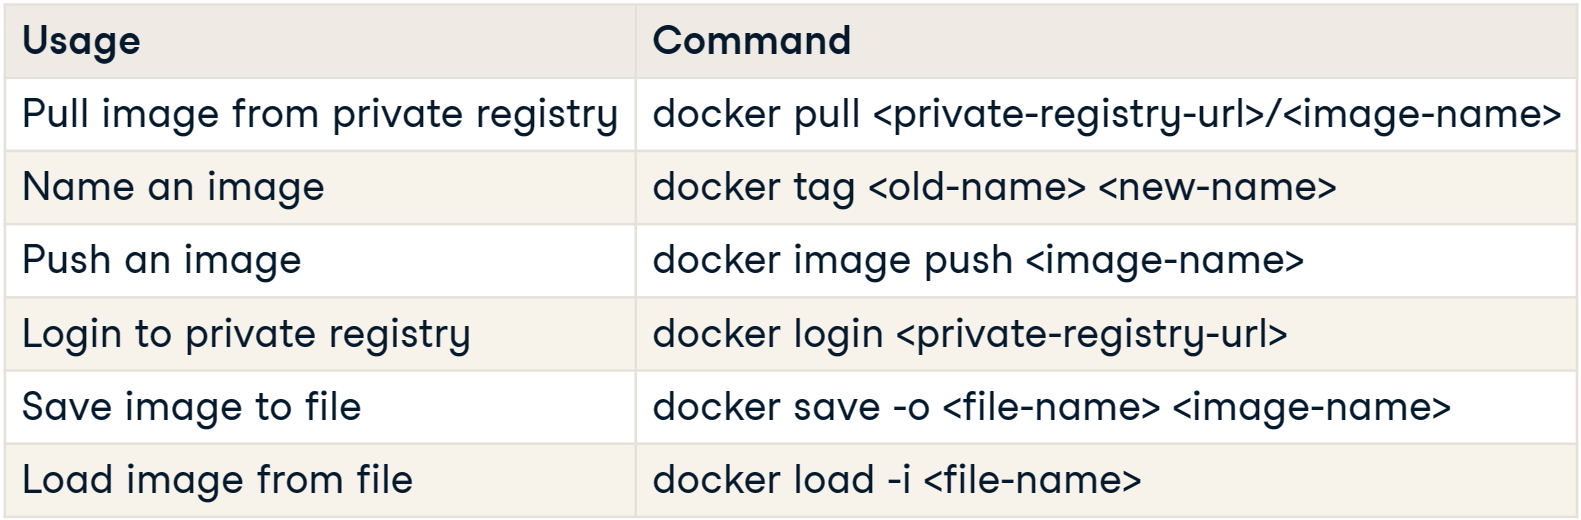

# Creating our own Docker images

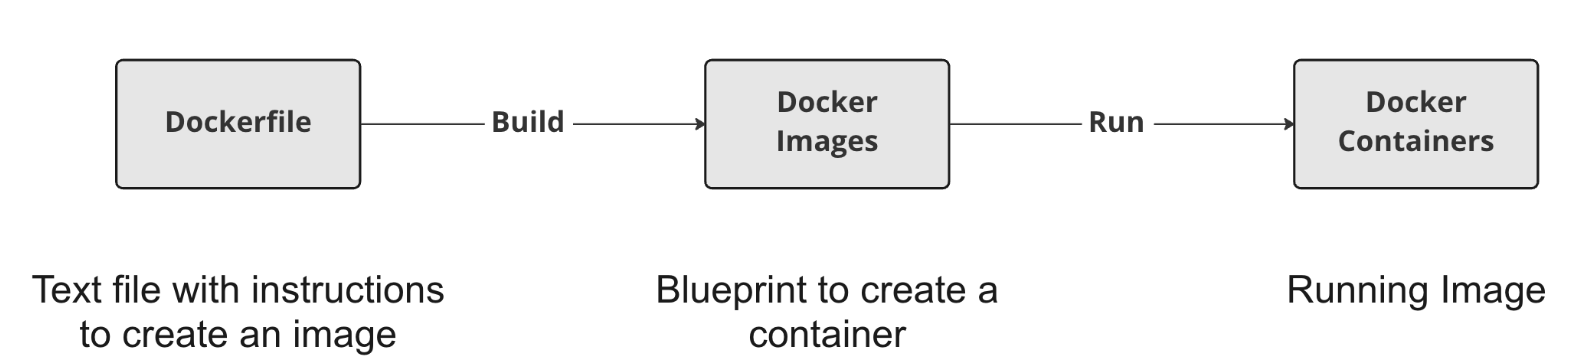

## Docker files

They contain a list of instructions with the blueprint of the images. They're text files containing all the commands we would run in the CLI to install the software we need, with the addition of Docker-specific syntax.

This file should be called Dockerfile for Docker to be able to find it. Docker runs the lines in a Dockerfile from top to bottom. The first line in a Dockerfile is always the FROM instruction (they always start from another image, specified with this instruction). We can base our images from any other image (public images, but also from private images). 

Example of a Dockerfile:
```dockerfile
FROM postgres
FROM ubuntu:22.04
```

After we have completed the script for the Dockerfile, we should build it in order to create the image. to do so we use the build command:

```bash
docker build location/to/Dockerfile
docker build . # if the file is in the same location as our CLI (the current working directory)
```

This command will assign a hash to the image we have just built, but in practice, we will always give our images a name and/or the version of the image:
```bash
docker build -t first_image location/to/Dockerfile
docker build -t first_image:v1 .
```

Once Docker has built our image, we can run and use our image just like the images we can download from Dockerhub.

## Customize your images

To achieve this, we will be using the RUN instruction. It allows us to run any valid shell command while building an image.
apt-get is a package manager which enables us to install all kinds of software.

The last command of the previous dockerfile example requires a user input, but while a Docker image is building it is not possible to manually give any input to the bash commands docker runs. To prevent any prompt we have to add the -y flag to make sure it doesn't need any input.

```dockerfile
FROM ubuntu
RUN apt-get update
RUN apt-get install -y python3
```

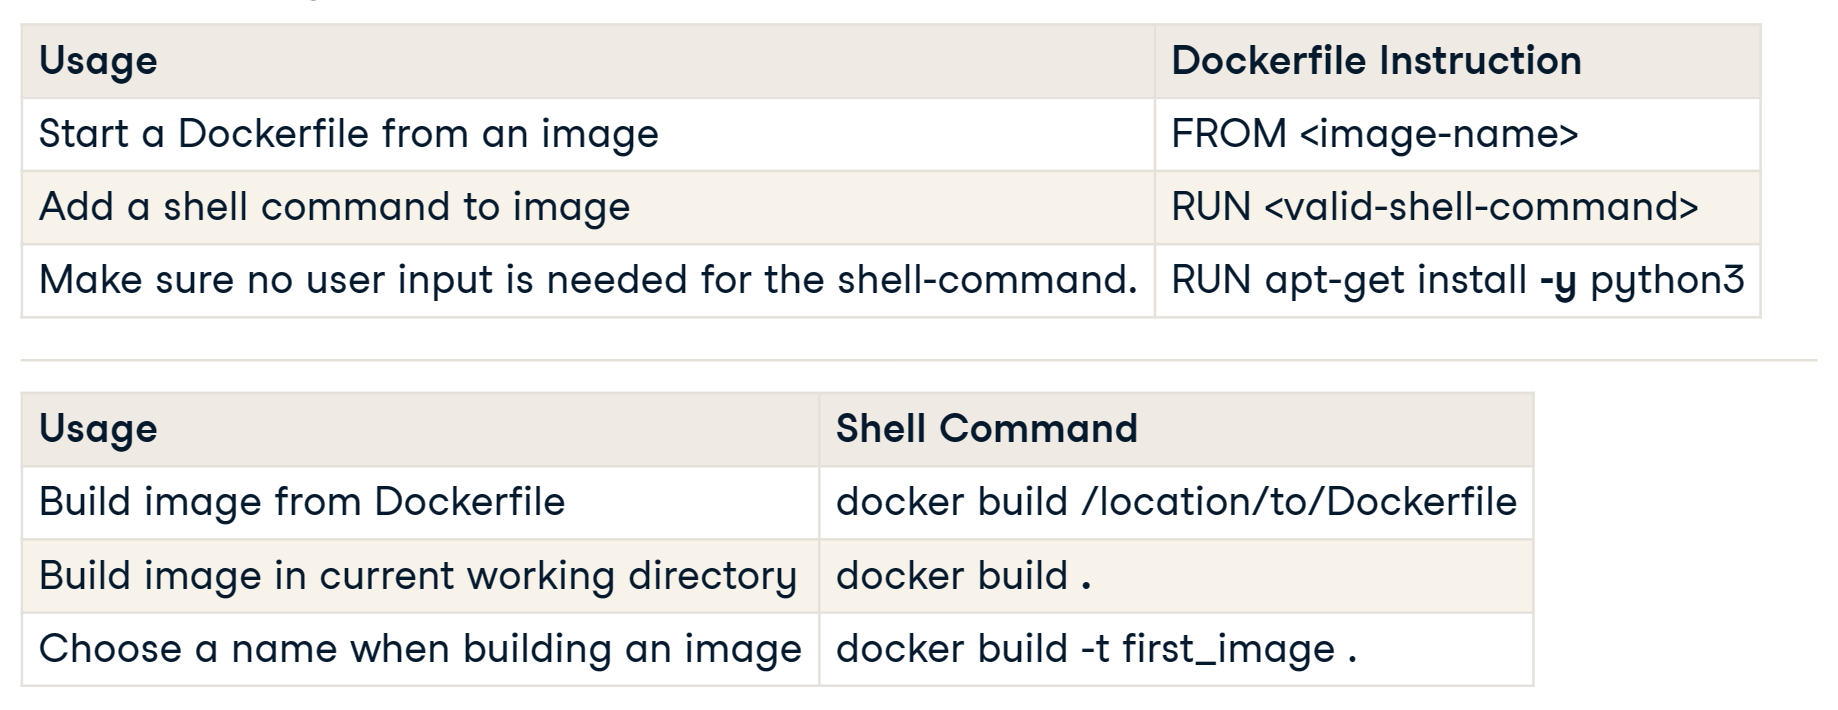